# CSE 258 HW1

## Luke Liem 
### A53231779

In [114]:
import numpy
from urllib.request import urlopen  # Read data from a webpage like a file
import scipy.optimize  # optimization
import random
import csv

In [115]:
def extract_data(file_path):
    f = open(file_path)
    
    dataset = []
    # Read the header:
    header = f.readline().strip().split('\t')
    for line in f:
        # Separate by tabs
        line = line.split('\t')
        # Convert to key-value pairs
        d = dict(zip(header, line))
        # Convert strings to integers for some fields:
        d['star_rating'] = int(d['star_rating'])
        d['helpful_votes'] = int(d['helpful_votes'])
        d['total_votes'] = int(d['total_votes'])
        dataset.append(d)
    f.close()
        
    return dataset

### Extract dataset

In [116]:
path = "amazon_reviews_us_Gift_Card_v1_00.tsv"
dataset = extract_data(path)


### Check out the data

In [117]:
dataset[0]

{'customer_id': '24371595',
 'helpful_votes': 0,
 'marketplace': 'US',
 'product_category': 'Gift Card',
 'product_id': 'B004LLIL5A',
 'product_parent': '346014806',
 'product_title': 'Amazon eGift Card - Celebrate',
 'review_body': 'Great birthday gift for a young adult.',
 'review_date': '2015-08-31\n',
 'review_headline': 'Five Stars',
 'review_id': 'R27ZP1F1CD0C3Y',
 'star_rating': 5,
 'total_votes': 0,
 'verified_purchase': 'Y',
 'vine': 'N'}

In [118]:
nRatings = len(dataset)
nRatings

149086

### (1) Distribution of Ratings

In [119]:
ratings = []
for d in dataset:
    ratings.append(d['star_rating'])

histogram = numpy.histogram(ratings, bins=[1,2,3,4,5,6])

print (histogram)

(array([  4793,   1569,   3156,   9859, 129709]), array([1, 2, 3, 4, 5, 6]))


### Create input data

In [120]:
verified = []
review_lengths = []

for d in dataset:
    
    if d['verified_purchase'] is 'Y':
        verified.append(1)
    else:
        verified.append(0)
    
    review_lengths.append(len(d['review_body']))

In [121]:
verified[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [122]:
review_lengths[:10]

[38, 101, 4, 4, 76, 94, 8, 26, 13, 37]

In [123]:
X = [[1,x1,x2] for (x1,x2) in zip(verified,review_lengths)]
y = [d for d in ratings]

In [124]:
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


## (3) Star Rating Predictor (2 features)

Theta_0 or offset is 4.84.

Theta_1 is 0.05, this mean if this is a verified purchase, the star rating is higher by 0.05.

Theta_2 is -0.00125, this means the longer the review, the lower the star rating. A 1000 character review will lower the star rating by 1.25.

In [125]:
theta

array([ 4.84461817e+00,  5.04148265e-02, -1.24659895e-03])

In [126]:
X = [[1,d] for d in verified]
y = [d for d in ratings]

In [127]:
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


## (4) Star Rating Predictor (1 features)

Theta_0 or offset is 4.58.

Theta_1 is 0.17, this mean if this is a verified purchase, the star rating is higher by 0.17.

The coefficients of the new predictor is different because it is trying to predict the star ratings with only 1 feature instead of two.

In [128]:
theta

array([4.57758356, 0.16852426])

### Split Test and Training Dataset

In [129]:
N = len(dataset)

split = N*9//10  # 90-10 train-test split

X_train = X[:split]
y_train = y[:split]
X_test= X[split:]
y_test = y[split:]

In [130]:
len(X_test), len(X_train),len(y_test), len(y_train)

(14909, 134177, 14909, 134177)

In [131]:
theta,residuals,rank,s = numpy.linalg.lstsq(X_train, y_train)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [132]:
theta

array([4.43657178, 0.31944366])

## (5) MSE for training set is 0.65; MSE for test set is 0.97

In [133]:
mse_train = numpy.sum(residuals/len(y_train))
mse_train

0.6557415620280942

In [134]:
def calc_mse(X,y,theta):
    X = numpy.matrix(X)
    y = numpy.matrix(y)
    theta = numpy.matrix(theta)
    y_pred = theta * X.T
    nData = y.shape[1]
    mse = numpy.sum(numpy.square(y_pred-y))/nData
    return mse

In [135]:
mse_test = calc_mse(X_test, y_test, theta)
mse_test

0.9713823241630476

In [136]:
verified = []
ratings = []
    
for d in dataset:
    
    if d['verified_purchase'] is 'Y':
        verified.append(1)
    else:
        verified.append(0)
    ratings.append(d['star_rating'])
    
X = [[1,d] for d in verified]
y = [d for d in ratings]

N = len(dataset)
traindata_fractions = [0.05*i for i in range(1,20)]
splits = [int(N*f) for f in traindata_fractions]

test_mses = []
train_mses = []

for split in splits:
    
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    
    theta,residuals,rank,s = numpy.linalg.lstsq(X_train, y_train)
    mse_train = numpy.sum(residuals/len(y_train))
    mse_test = calc_mse(X_test, y_test, theta)
    
    print (mse_train, mse_test)
    
    test_mses.append(mse_test)
    train_mses.append(mse_train)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


0.7006982282502987 0.6951867111781488
0.7268142699984984 0.6966317384721408
0.6825042293074014 0.7032213259218499
0.6208235649583758 0.7140572226189882
0.5966716821200916 0.7250954771553023
0.5887728993796847 0.7374054106582334
0.5951413645076097 0.7468276449082581
0.5881553617648668 0.7633095448029433
0.57466977090579 0.7899097813325713
0.583882314406162 0.800700621078346
0.5948417190920834 0.8108609179725353
0.6118910539567901 0.8106254541772369
0.6377280754933884 0.7923955289027994
0.639582946257374 0.8128031456332272
0.6407258411572475 0.8434395602973844
0.6380905777790898 0.8979453776960673
0.6427986606218588 0.9557986803515324
0.6557415620280942 0.9713823241630476
0.6547734414381697 1.270901343842741


## (7) Train and Test Error as function of Train Data Size

As train data size increases, train error is maintained between 0.6 and 0.7, but test error increases from 0.7 to 1.2. This is likely due to the fact that the dataset has not been shuffled prior to splitting into train and test datasets.

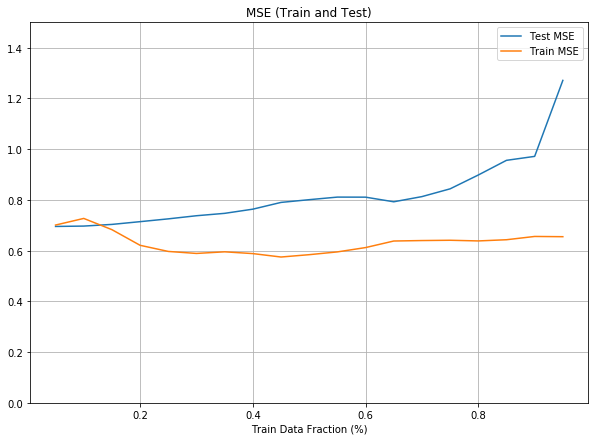

In [137]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.xlabel('Train Data Fraction (%)')
plt.title('MSE (Train and Test)')
plt.ylim(0,1.5)
plt.grid(True)

plt.plot(traindata_fractions, test_mses, label='Test MSE',)
plt.plot(traindata_fractions, train_mses, label='Train MSE',)

plt.legend()
plt.show()

### Rerun experiment with shuffled dataset

In [138]:
path = "amazon_reviews_us_Gift_Card_v1_00.tsv"
dataset = extract_data(path)
random.shuffle(dataset)

In [139]:
verified = []
ratings = []
    
for d in dataset:
    
    if d['verified_purchase'] is 'Y':
        verified.append(1)
    else:
        verified.append(0)
    ratings.append(d['star_rating'])
    
X = [[1,d] for d in verified]
y = [d for d in ratings]

N = len(dataset)
traindata_fractions = [0.05*i for i in range(1,20)]
splits = [int(N*f) for f in traindata_fractions]

test_mses = []
train_mses = []

for split in splits:
    
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    
    theta,residuals,rank,s = numpy.linalg.lstsq(X_train, y_train)
    mse_train = numpy.sum(residuals/len(y_train))
    mse_test = calc_mse(X_test, y_test, theta)
    
    print (mse_train, mse_test)
    
    test_mses.append(mse_test)
    train_mses.append(mse_train)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


0.720588139308838 0.6840579830307647
0.715611047585481 0.6822179725799437
0.6892187014458216 0.6848506807998394
0.6903579052548512 0.684358190357688
0.6901446230678507 0.6839644011182304
0.6825286449045777 0.686742751421079
0.6749779124408092 0.6911470470574455
0.6790988476869942 0.6897376314220678
0.6841529555206305 0.6865608068005906
0.6802723901573082 0.6906865239275276
0.6794430854907546 0.6928660285246062
0.6824611448189933 0.6900073546523573
0.6829423938648116 0.6901944489167364
0.6845603912715954 0.6876211777960245
0.6836410804631466 0.6909869279749952
0.6842185978203469 0.6905152541477338
0.6858334262128104 0.6834624701425727
0.68753935343354 0.6669323825330008
0.6859921133976677 0.675697705480562


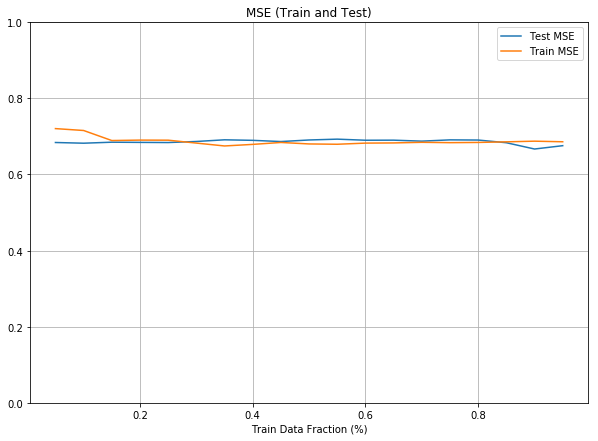

In [140]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.xlabel('Train Data Fraction (%)')
plt.title('MSE (Train and Test)')
plt.ylim(0,1.0)
plt.grid(True)

plt.plot(traindata_fractions, test_mses, label='Test MSE',)
plt.plot(traindata_fractions, train_mses, label='Train MSE',)

plt.legend()
plt.show()

In [141]:
from sklearn import linear_model

In [142]:
path = "amazon_reviews_us_Gift_Card_v1_00.tsv"
dataset = extract_data(path)

In [143]:
verified = []
review_lengths = []
ratings = []

for d in dataset:
    
    if d['verified_purchase'] is 'Y':
        verified.append(1)
    else:
        verified.append(0)
    
    review_lengths.append(len(d['review_body']))
    ratings.append(d['star_rating'])


In [144]:
X = [[1,x1,x2] for (x1,x2) in zip(ratings,review_lengths)]
y = [d for d in verified]

In [145]:
N = len(dataset)

split = N*9//10  # 90-10 train-test split

X_train = X[:split]
y_train = y[:split]
X_test= X[split:]
y_test = y[split:]

len(X_test), len(X_train),len(y_test), len(y_train)

(14909, 134177, 14909, 134177)

In [146]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## (8) Logistic Regression

The logistic regressor has a training accuracy of 95%, but it attains a test accuracy of only 56%. This is because of the difference in prevalance of "verified purchase" in the two datasets. 91% of the overall dataset (training+test) have positive labels (verified reviews), while only 56% of the test dataset have positive labels.

In [147]:
train_predictions = model.predict(X_train)
correct_trainPredictions = train_predictions == y_train

sum(correct_trainPredictions) / len(correct_trainPredictions)

0.9516161488183519

In [148]:
test_predictions = model.predict(X_test)
correct_testPredictions = test_predictions == y_test

sum(correct_testPredictions) / len(correct_testPredictions)

0.5589241397813401

In [149]:
sum(y) / len(y)

0.9125068752263794

In [150]:
sum(y_test) / len(y_test)

0.5586558454624724

In [151]:
path = "amazon_reviews_us_Gift_Card_v1_00.tsv"
dataset = extract_data(path)
random.shuffle(dataset)

In [154]:
verified = []
helpful_votes = []
total_votes = []
ratings = []

for d in dataset:
    
    if d['verified_purchase'] is 'Y':
        verified.append(1)
    else:
        verified.append(0)
    
    helpful_votes.append(d['helpful_votes'])
    total_votes.append(d['total_votes'])
    ratings.append(d['star_rating'])

In [155]:
X = [[1,x1,x2,x3] for (x1,x2,x3) in zip(ratings,helpful_votes,total_votes )]
y = [d for d in verified]

In [156]:
N = len(dataset)

split = N*9//10  # 90-10 train-test split

X_train = X[:split]
y_train = y[:split]
X_test= X[split:]
y_test = y[split:]

len(X_test), len(X_train),len(y_test), len(y_train)

(14909, 134177, 14909, 134177)

In [157]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

/home/lukeliem/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## (9) More accurate predictor

I have built a 3-feature predictor using ratings, helpful_votes and total_votes. It has test and training accuracy of 91%. 

In [158]:
test_predictions = model.predict(X_test)
correct_testPredictions = test_predictions == y_test

sum(correct_testPredictions) / len(correct_testPredictions)

0.9122006841505131

In [159]:
train_predictions = model.predict(X_train)
correct_trainPredictions = train_predictions == y_train

sum(correct_trainPredictions) / len(correct_trainPredictions)

0.9126452372612296